#### The emergence and swift expansion of the internet, social media, and various online platforms have led to the incessant and rapid production of opinionated textual content. This public textual data contains valuable insights that can be exploited in a variety of fields, such as marketing, finance, politics, and security. 
---


##### Football is one of the most loved sports worldwide. This dataset contain around 30,000 tweets from the very first day of FIFA worldcup 2022.
---

> Dataset - [FIFA WORLD CUP 2022 QATAR](https://www.kaggle.com/datasets/tirendazacademy/fifa-world-cup-2022-tweets/data)

> Model Used for Sentiment analysis: cardiffnl/twitter-roberta-base-sentiment-latest

> This model was trained on ~124 million tweets from January 2018 to December 2021.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import plotly.express as px
from wordcloud import WordCloud
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
import requests
import numpy as np
from PIL import Image
from io import BytesIO
import emoji
import re

[nltk_data] Downloading package stopwords to /home/oem/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from transformers import pipeline

/home/oem/.local/lib/python3.6/site-packages/google/auth/crypt/_cryptography_rsa.py:22: CryptographyDeprecationWarning:

Python 3.6 is no longer supported by the Python core team. Therefore, support for it is deprecated in cryptography and will be removed in a future release.



In [3]:
sentiment_pipeline = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


In [4]:
df = pd.read_csv("fifa_world_cup_2022_tweets.csv")
df.head()

Unnamed: 0               Date Created  Number of Likes  \
0           0  2022-11-20 23:59:21+00:00                4   
1           1  2022-11-20 23:59:01+00:00                3   
2           2  2022-11-20 23:58:41+00:00                1   
3           3  2022-11-20 23:58:33+00:00                1   
4           4  2022-11-20 23:58:28+00:00                0   

       Source of Tweet                                              Tweet  \
0      Twitter Web App  What are we drinking today @TucanTribe \n@MadB...   
1   Twitter for iPhone  Amazing @CanadaSoccerEN  #WorldCup2022 launch ...   
2   Twitter for iPhone  Worth reading while watching #WorldCup2022 htt...   
3      Twitter Web App  Golden Maknae shinning bright\n\nhttps://t.co/...   
4  Twitter for Android  If the BBC cares so much about human rights, h...   

  Sentiment  
0   neutral  
1  positive  
2  positive  
3  positive  
4  negative

In [5]:
df.shape

(22524, 6)

In [6]:
df.describe()

Unnamed: 0  Number of Likes
count  22524.000000     22524.000000
mean   11261.500000        23.822856
std     6502.263068      2128.018705
min        0.000000         0.000000
25%     5630.750000         0.000000
50%    11261.500000         0.000000
75%    16892.250000         2.000000
max    22523.000000    316867.000000

In [7]:
# Removing the first unnamed column
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [8]:
df

Date Created  Number of Likes      Source of Tweet  \
0      2022-11-20 23:59:21+00:00                4      Twitter Web App   
1      2022-11-20 23:59:01+00:00                3   Twitter for iPhone   
2      2022-11-20 23:58:41+00:00                1   Twitter for iPhone   
3      2022-11-20 23:58:33+00:00                1      Twitter Web App   
4      2022-11-20 23:58:28+00:00                0  Twitter for Android   
...                          ...              ...                  ...   
22519  2022-11-20 00:00:21+00:00                1      Twitter Web App   
22520  2022-11-20 00:00:03+00:00                0             DenetPro   
22521  2022-11-20 00:00:01+00:00                2   Twitter for iPhone   
22522  2022-11-20 00:00:00+00:00               11      Twitter Web App   
22523  2022-11-20 00:00:00+00:00               24      Twitter Web App   

                                                   Tweet Sentiment  
0      What are we drinking today @TucanTribe \n@MadB...   neutral  
1      Amazing @CanadaSoccerEN  #WorldCup2022 launch ...  positive  
2      Worth reading while watching #WorldCup2022 htt...  positive  
3      Golden Maknae shinning bright\n\nhttps://t.co/...  positive  
4      If the BBC cares so much about human rights, h...  negative  
...                                                  ...       ...  
22519            Here We go World cup 2022 #WorldCup2022  positive  
22520  Anderlecht confirms former Viborg FF's Jesper ...   neutral  
22521  Great thread to read before the start of #Worl...  positive  
22522  Raphinha wants Brazil to be united at the #Wor...  positive  
22523  How to buy $SOT on PinkSale?🤔\n\nHave you been...   neutral  

[22524 rows x 5 columns]

In [9]:
# Extract minutes and hours 
df['minutes'] = pd.to_datetime(df['Date Created'],
                                format='%Y-%m-%d %H:%M:%S').dt.minute
df['hours'] = pd.to_datetime(df['Date Created'],
                                format='%Y-%m-%d %H:%M:%S').dt.hour
df

Date Created  Number of Likes      Source of Tweet  \
0      2022-11-20 23:59:21+00:00                4      Twitter Web App   
1      2022-11-20 23:59:01+00:00                3   Twitter for iPhone   
2      2022-11-20 23:58:41+00:00                1   Twitter for iPhone   
3      2022-11-20 23:58:33+00:00                1      Twitter Web App   
4      2022-11-20 23:58:28+00:00                0  Twitter for Android   
...                          ...              ...                  ...   
22519  2022-11-20 00:00:21+00:00                1      Twitter Web App   
22520  2022-11-20 00:00:03+00:00                0             DenetPro   
22521  2022-11-20 00:00:01+00:00                2   Twitter for iPhone   
22522  2022-11-20 00:00:00+00:00               11      Twitter Web App   
22523  2022-11-20 00:00:00+00:00               24      Twitter Web App   

                                                   Tweet Sentiment  minutes  \
0      What are we drinking today @TucanTribe \n@MadB...   neutral       59   
1      Amazing @CanadaSoccerEN  #WorldCup2022 launch ...  positive       59   
2      Worth reading while watching #WorldCup2022 htt...  positive       58   
3      Golden Maknae shinning bright\n\nhttps://t.co/...  positive       58   
4      If the BBC cares so much about human rights, h...  negative       58   
...                                                  ...       ...      ...   
22519            Here We go World cup 2022 #WorldCup2022  positive        0   
22520  Anderlecht confirms former Viborg FF's Jesper ...   neutral        0   
22521  Great thread to read before the start of #Worl...  positive        0   
22522  Raphinha wants Brazil to be united at the #Wor...  positive        0   
22523  How to buy $SOT on PinkSale?🤔\n\nHave you been...   neutral        0   

       hours  
0         23  
1         23  
2         23  
3         23  
4         23  
...      ...  
22519      0  
22520      0  
22521      0  
22522      0  
22523      0  

[22524 rows x 7 columns]

In [10]:
stop_words = set(stopwords.words("english"))


In [11]:

# Let's count the number of tweets by sentiments
sentiment_counts = df.groupby(['Sentiment']).size()
print(sentiment_counts)

Sentiment
negative    5784
neutral     8251
positive    8489
dtype: int64


In [12]:
fig = px.pie(sentiment_counts, values=sentiment_counts.values, names=sentiment_counts.index,color_discrete_sequence=px.colors.qualitative.Vivid)
fig.show()

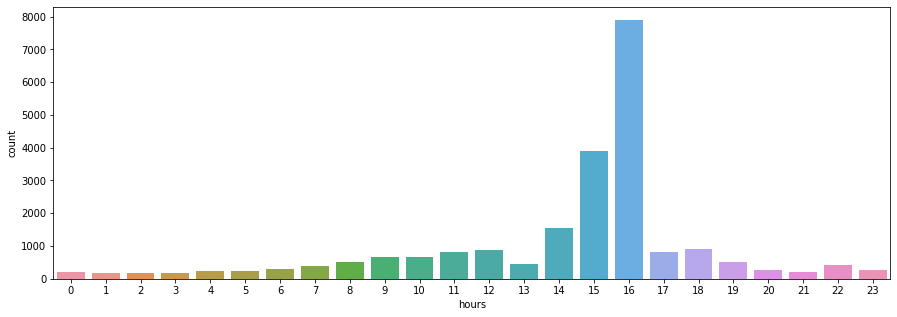

In [13]:
# Finding the hour with most num of tweets
plt.figure(figsize = (15,5));
sns.countplot(data = df , x = "hours");

In [14]:
#clean data 
def clean(tweet):
    tweet = tweet.split(' ')
    tweet = [t for t in tweet if t not in string.punctuation]
    tweet = [t for t in tweet if t.lower() not in stop_words]
    tweet = ' '.join(tweet)
    tweet = re.sub(r'https?://[^\s\n\r]+' , '' , tweet)
    tweet = re.sub('\n' , '' , tweet)
    tweet = re.sub(r'@','',tweet)
    tweet = re.sub(r'#','',tweet)
    tweet = re.sub(r'!','',tweet)
    tweet = tweet.replace(".","")
    tweet = tweet.replace("(","")
    tweet = tweet.replace(")","")
    tweet = tweet.replace('"'," ")
    tweet = tweet.replace('$'," ")
    tweet = tweet.replace('%'," ")
    tweet = tweet.replace('&'," ")
    tweet = " ".join(tweet.split())
    return tweet

In [15]:
df['Tweet'] = df['Tweet'].apply(clean)

In [16]:
df

Date Created  Number of Likes      Source of Tweet  \
0      2022-11-20 23:59:21+00:00                4      Twitter Web App   
1      2022-11-20 23:59:01+00:00                3   Twitter for iPhone   
2      2022-11-20 23:58:41+00:00                1   Twitter for iPhone   
3      2022-11-20 23:58:33+00:00                1      Twitter Web App   
4      2022-11-20 23:58:28+00:00                0  Twitter for Android   
...                          ...              ...                  ...   
22519  2022-11-20 00:00:21+00:00                1      Twitter Web App   
22520  2022-11-20 00:00:03+00:00                0             DenetPro   
22521  2022-11-20 00:00:01+00:00                2   Twitter for iPhone   
22522  2022-11-20 00:00:00+00:00               11      Twitter Web App   
22523  2022-11-20 00:00:00+00:00               24      Twitter Web App   

                                                   Tweet Sentiment  minutes  \
0      drinking today TucanTribe MadBears_ lkinc_algo...   neutral       59   
1      Amazing CanadaSoccerEN WorldCup2022 launch vid...  positive       59   
2                    Worth reading watching WorldCup2022  positive       58   
3      Golden Maknae shinning brightJeonJungkook Jung...  positive       58   
4      BBC cares much human rights, homosexual rights...  negative       58   
...                                                  ...       ...      ...   
22519                     go World cup 2022 WorldCup2022  positive        0   
22520  Anderlecht confirms former Viborg FF's Jesper ...   neutral        0   
22521               Great thread read start WorldCup2022  positive        0   
22522      Raphinha wants Brazil united WorldCup2022 👊🇧🇷  positive        0   
22523  buy SOT PinkSale?🤔Have confused buy tokens Pin...   neutral        0   

       hours  
0         23  
1         23  
2         23  
3         23  
4         23  
...      ...  
22519      0  
22520      0  
22521      0  
22522      0  
22523      0  

[22524 rows x 7 columns]

In [17]:
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  
                               u"\U0001F300-\U0001F5FF"  
                               u"\U0001F680-\U0001F6FF"  
                               u"\U0001F1E0-\U0001F1FF"
                               "]+", flags=re.UNICODE)
    
    return emoji_pattern.sub(r'', text)

In [18]:
df['Tweet'] = df['Tweet'].apply(remove_emojis)

In [19]:
df

Date Created  Number of Likes      Source of Tweet  \
0      2022-11-20 23:59:21+00:00                4      Twitter Web App   
1      2022-11-20 23:59:01+00:00                3   Twitter for iPhone   
2      2022-11-20 23:58:41+00:00                1   Twitter for iPhone   
3      2022-11-20 23:58:33+00:00                1      Twitter Web App   
4      2022-11-20 23:58:28+00:00                0  Twitter for Android   
...                          ...              ...                  ...   
22519  2022-11-20 00:00:21+00:00                1      Twitter Web App   
22520  2022-11-20 00:00:03+00:00                0             DenetPro   
22521  2022-11-20 00:00:01+00:00                2   Twitter for iPhone   
22522  2022-11-20 00:00:00+00:00               11      Twitter Web App   
22523  2022-11-20 00:00:00+00:00               24      Twitter Web App   

                                                   Tweet Sentiment  minutes  \
0      drinking today TucanTribe MadBears_ lkinc_algo...   neutral       59   
1      Amazing CanadaSoccerEN WorldCup2022 launch vid...  positive       59   
2                    Worth reading watching WorldCup2022  positive       58   
3      Golden Maknae shinning brightJeonJungkook Jung...  positive       58   
4      BBC cares much human rights, homosexual rights...  negative       58   
...                                                  ...       ...      ...   
22519                     go World cup 2022 WorldCup2022  positive        0   
22520  Anderlecht confirms former Viborg FF's Jesper ...   neutral        0   
22521               Great thread read start WorldCup2022  positive        0   
22522         Raphinha wants Brazil united WorldCup2022   positive        0   
22523  buy SOT PinkSale?🤔Have confused buy tokens Pin...   neutral        0   

       hours  
0         23  
1         23  
2         23  
3         23  
4         23  
...      ...  
22519      0  
22520      0  
22521      0  
22522      0  
22523      0  

[22524 rows x 7 columns]

In [20]:
df['Number of Likes'].value_counts().head(10)

0    11627
1     4419
2     1889
3     1016
4      608
5      459
6      299
7      242
8      200
9      167
Name: Number of Likes, dtype: int64

#### Identifying the top sources of tweets

In [21]:
# Group by the 'Source of Tweet' column and get the counts
source_counts = df['Source of Tweet'].value_counts()
# Select only the top 10 sources
top_10_sources = source_counts.head(10)

In [22]:
top_10_df = pd.DataFrame({'Source of Tweet': top_10_sources.index, 'Tweet Count': top_10_sources.values})
top_10_df

Source of Tweet  Tweet Count
0        Twitter for iPhone         9507
1       Twitter for Android         6820
2           Twitter Web App         4505
3                 TweetDeck          386
4          Twitter for iPad          240
5  Qualtrics Social Connect          165
6            Hootsuite Inc.          146
7                    Buffer           71
8                 Instagram           62
9          Tweetbot for iΟS           52

In [23]:
fig = px.bar(top_10_df,height=500,text_auto='.2s', title="Top 10 Sources of Tweets", color='Source of Tweet')
fig.show()

##### Analysis shows that Tweets via iPhone and Android are in large number as compare to rest of the sources. 

In [24]:
# Group data by source of tweet and order by number of likes

grouped_data = df.groupby(['Source of Tweet', 'Number of Likes'], as_index=False).count()

grouped_data


Source of Tweet  Number of Likes  Date Created  Tweet  Sentiment  \
0        Adobe Express                1             1      1          1   
1        Adobe Express                4             1      1          1   
2       Agorapulse app                0             2      2          2   
3       Agorapulse app                1             4      4          4   
4       Agorapulse app                3             1      1          1   
..                 ...              ...           ...    ...        ...   
789       socialbu.com               24             1      1          1   
790  threadcreator.com                0             1      1          1   
791               Оwly                0            12     12         12   
792               Оwly                1             1      1          1   
793               Оwly                3             1      1          1   

     minutes  hours  
0          1      1  
1          1      1  
2          2      2  
3          4      4  
4          1      1  
..       ...    ...  
789        1      1  
790        1      1  
791       12     12  
792        1      1  
793        1      1  

[794 rows x 7 columns]

In [25]:
grouped_data2 = grouped_data.groupby('Source of Tweet')['Number of Likes'].sum().reset_index()
grouped_data2

Source of Tweet  Number of Likes
0            Adobe Express                5
1           Agorapulse app                4
2    Albatross for Twitter                0
3       Aviary for Twitter                0
4          Blog2Social APP                4
..                     ...              ...
104              eClincher                0
105          notice.com.ng                0
106           socialbu.com               24
107      threadcreator.com                0
108                   Оwly                4

[109 rows x 2 columns]

In [26]:
# Sort the groups by total likes in descending order
sorted_data = grouped_data2.sort_values(by="Number of Likes", ascending=False)

# Select the top 10 sources
top_10_sources = sorted_data.head(10)


In [70]:
# fig = px.line(x=top_10_sources['Number of Likes'], y=top_10_sources['Source of Tweet'])
# fig.show()
fig = px.bar(top_10_sources,x=top_10_sources['Number of Likes'], y=top_10_sources['Source of Tweet'], height=500,text_auto='.2s', title="Sources of Tweets by Number of Likes", color=top_10_sources['Source of Tweet'])
fig.show("png")

In [28]:
top_10_sources

Source of Tweet  Number of Likes
93    Twitter for iPhone           355688
88       Twitter Web App            51470
87  Twitter Media Studio            41088
90   Twitter for Android            18320
80             TweetDeck            14933
70   Sprinklr Publishing             2441
31        Hootsuite Inc.              771
92      Twitter for iPad              747
39                Loomly              666
71         Sprout Social              576

#### Souces of Tweets over time

> This visualization analysis shows that most of the tweet sources are active within the time
window 09:00 to 18:00


In [48]:
fig = px.line(df, x='Date Created', y='Source of Tweet', title='Sources of Tweets Over Time', template='seaborn')

# display the plot
fig.show("png")

In [55]:
df['Date Created'] = pd.to_datetime(df['Date Created'])

# Group the data by 'Date Created' and 'Source of Tweet' and count the occurrences
tweet_counts = df.groupby(['Date Created', 'Source of Tweet']).size().reset_index(name='Tweet Count')

fig = px.line(tweet_counts, x='Date Created', y='Tweet Count', color='Source of Tweet',
              title='Count of Tweets per Source Over Time', template='plotly')

fig.show("png")

#### Analysis
> The above visualization shows that most of the tweets coming in via the "Twitter Web app" and the "twitter for iPhone"

#### Wordcloud of most mentioned words

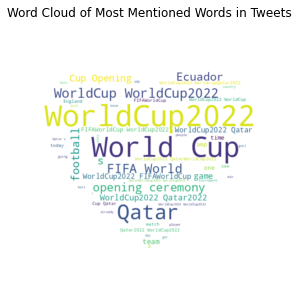

In [29]:
all_tweets = ' '.join(df['Tweet'].astype(str).values)

# From URL - Mask
response = requests.get("https://raw.githubusercontent.com/R-CoderDotCom/samples/main/wordcloud-mask.jpg")
mask = np.array(Image.open(BytesIO(response.content)))

# Create a WordCloud object
wordcloud = WordCloud(max_font_size = 80, mask=mask, background_color="white", max_words=50).generate(all_tweets)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Mentioned Words in Tweets')
plt.show()

## To get the sentiment of tweet Text

In [30]:
df

Date Created  Number of Likes      Source of Tweet  \
0      2022-11-20 23:59:21+00:00                4      Twitter Web App   
1      2022-11-20 23:59:01+00:00                3   Twitter for iPhone   
2      2022-11-20 23:58:41+00:00                1   Twitter for iPhone   
3      2022-11-20 23:58:33+00:00                1      Twitter Web App   
4      2022-11-20 23:58:28+00:00                0  Twitter for Android   
...                          ...              ...                  ...   
22519  2022-11-20 00:00:21+00:00                1      Twitter Web App   
22520  2022-11-20 00:00:03+00:00                0             DenetPro   
22521  2022-11-20 00:00:01+00:00                2   Twitter for iPhone   
22522  2022-11-20 00:00:00+00:00               11      Twitter Web App   
22523  2022-11-20 00:00:00+00:00               24      Twitter Web App   

                                                   Tweet Sentiment  minutes  \
0      drinking today TucanTribe MadBears_ lkinc_algo...   neutral       59   
1      Amazing CanadaSoccerEN WorldCup2022 launch vid...  positive       59   
2                    Worth reading watching WorldCup2022  positive       58   
3      Golden Maknae shinning brightJeonJungkook Jung...  positive       58   
4      BBC cares much human rights, homosexual rights...  negative       58   
...                                                  ...       ...      ...   
22519                     go World cup 2022 WorldCup2022  positive        0   
22520  Anderlecht confirms former Viborg FF's Jesper ...   neutral        0   
22521               Great thread read start WorldCup2022  positive        0   
22522         Raphinha wants Brazil united WorldCup2022   positive        0   
22523  buy SOT PinkSale?🤔Have confused buy tokens Pin...   neutral        0   

       hours  
0         23  
1         23  
2         23  
3         23  
4         23  
...      ...  
22519      0  
22520      0  
22521      0  
22522      0  
22523      0  

[22524 rows x 7 columns]

In [31]:
df_pos = df[df["Sentiment"]=="positive"]
df_neg = df[df["Sentiment"]=="negative"]
df_neu = df[df["Sentiment"]=="neutral"]

In [32]:
df_pos

Date Created  Number of Likes     Source of Tweet  \
1      2022-11-20 23:59:01+00:00                3  Twitter for iPhone   
2      2022-11-20 23:58:41+00:00                1  Twitter for iPhone   
3      2022-11-20 23:58:33+00:00                1     Twitter Web App   
8      2022-11-20 23:56:10+00:00                1  Twitter for iPhone   
9      2022-11-20 23:56:08+00:00                0  Twitter for iPhone   
...                          ...              ...                 ...   
22509  2022-11-20 00:03:04+00:00                0  Twitter for iPhone   
22517  2022-11-20 00:00:39+00:00                2  Twitter for iPhone   
22519  2022-11-20 00:00:21+00:00                1     Twitter Web App   
22521  2022-11-20 00:00:01+00:00                2  Twitter for iPhone   
22522  2022-11-20 00:00:00+00:00               11     Twitter Web App   

                                                   Tweet Sentiment  minutes  \
1      Amazing CanadaSoccerEN WorldCup2022 launch vid...  positive       59   
2                    Worth reading watching WorldCup2022  positive       58   
3      Golden Maknae shinning brightJeonJungkook Jung...  positive       58   
8      World Cup starts Qatar, it’s Black Awareness D...  positive       56   
9      WorldCup2022 ITVSport amp; LFSYSTEMMUSIC go to...  positive       56   
...                                                  ...       ...      ...   
22509  Germany big players World Cup, can’t see past ...  positive        3   
22517  World Cup starts TODAYQatar2022 Football World...  positive        0   
22519                     go World cup 2022 WorldCup2022  positive        0   
22521               Great thread read start WorldCup2022  positive        0   
22522         Raphinha wants Brazil united WorldCup2022   positive        0   

       hours  
1         23  
2         23  
3         23  
8         23  
9         23  
...      ...  
22509      0  
22517      0  
22519      0  
22521      0  
22522      0  

[8489 rows x 7 columns]

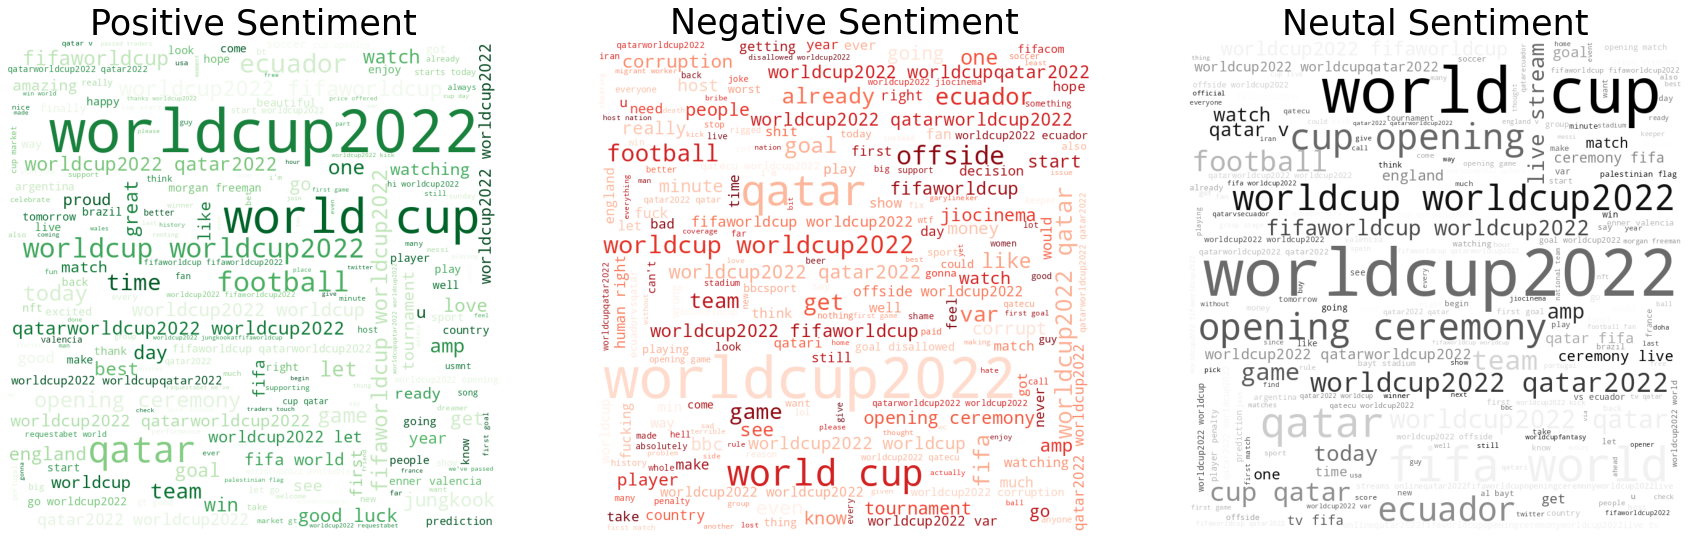

In [33]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[30, 15])
comment_words = '' 

stopwords = set(STOPWORDS) 

for val in df_pos['Tweet']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
   

wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='white',
                colormap="Greens",
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Positive Sentiment',fontsize=35);

comment_words = ''

for val in df_neg['Tweet']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "




wordcloud2 = WordCloud(width = 800, height = 800, 
                background_color ='white',
                colormap="Reds",
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)  
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Negative Sentiment',fontsize=35);



comment_words = ''
for val in df_neu['Tweet']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

wordcloud3 = WordCloud(width = 800, height = 800, 
                background_color ='white',
                colormap="Greys",
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('Neutal Sentiment',fontsize=35);